In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager

In [17]:
font_manager.fontManager.addfont('/Users/arpadambrusz/Desktop/jupyter_work/fonts/Rajdhani/Rajdhani-Medium.ttf')
font_manager.fontManager.addfont('/Users/arpadambrusz/Desktop/jupyter_work/fonts/Kdam_Thmor_Pro/KdamThmorPro-Regular.ttf')
font_manager.fontManager.addfont('/Users/arpadambrusz/Desktop/jupyter_work/fonts/Blinker/Blinker-Regular.ttf')
font_manager.fontManager.addfont('/Users/arpadambrusz/Desktop/jupyter_work/fonts/Canonatia.ttf')
font_manager.fontManager.addfont('/Users/arpadambrusz/Desktop/jupyter_work/fonts/Athletic.TTF')
font_manager.fontManager.addfont('/Users/arpadambrusz/Desktop/jupyter_work/fonts/college_block_2_0/College Block 2.0 D.otf')

In [7]:
d17 = pd.read_excel('/Users/arpadambrusz/Desktop/17Ford_NB2_bővített.xlsx', index_col=[0])

In [8]:
d17.head()

,Team,real,xCalc,diff,Pont,xPont,Shots,oppShots,cumXg,opp_cXg,h11,a11,hg,ag,xg_1,oxg_1,act
0,MTK,3,1,2,31,39.41,348,181,49.80,21.00,8,2,49,29,2.93,1.24,fire
1,Diosgyor,1,2,-1,37,32.81,276,193,33.26,19.71,2,3,33,16,1.96,1.16,fire
2,Gyirmot,5,3,2,30,29.62,246,198,33.54,24.35,5,3,31,17,1.97,1.43,-
3,Gyori ETO,8,4,4,23,29.38,250,162,26.47,17.64,2,0,19,15,1.56,1.04,-
4,Szombathelyi Haladas,9,5,4,23,26.84,226,203,26.66,21.14,5,3,19,21,1.57,1.24,fire


In [18]:
plt.rcParams['ytick.labelsize']  = 12
plt.rcParams['font.family'] = 'Blinker'
plt.rcParams['ytick.labelright']  = True

In [23]:
def plot_xTab(dataFr):
    
    backboard = '#efd7b4'
    fig,ax = plt.subplots(figsize=(12,7))

    
    #we define and fix the fonts - if you want to change something, just rewrite it here
    main_font = 'Kdam Thmor Pro'
    signature = 'Canonatia'
    number = 'College Block 2.0'
    col_font = 'Athletic'

    fig.set_facecolor(backboard)
    ax.patch.set_facecolor(backboard)


    ax.set_title("Real vs xgCalc position \nMerkantil Bank Liga NB2 - 2022-23 (17.round)",
                loc='left',
                fontweight='light',
                fontsize=20,
                 color = 'k',alpha=0.8,
                 fontfamily=main_font
                )

    ax.grid(ls='-',lw=0.1,color='k',zorder=1, which='both')

    orient = ['top','bottom','left','right']
    for m in orient:
            ax.spines[m].set_visible(False)

    ax.set_xlabel('Position', fontfamily=main_font, size=15)
    ax.set_ylabel('Team', fontfamily = main_font, size=15,)

    for e, x in enumerate(dataFr.Team):
        #the bars showing the real result are drawn on the left and the calculated result on the right
        ax.barh(f'{x}',0-dataFr[dataFr.Team == x].real.values[0], color= '#152f50')
        ax.barh(f'{x}',dataFr[dataFr.Team == x].xCalc.values[0], color='#8f776c')
        
        # we coordinate positions belonging to the right place
        ax.text(dataFr[dataFr.Team == x].real.values[0]*-1-1,dataFr[dataFr.Team == x].xCalc.values[0]-0.8, \
                f'{dataFr[dataFr.Team == x].real.values[0]}', color='k', fontfamily=number)
        ax.text(dataFr[dataFr.Team == x].xCalc.values[0]+0.2,dataFr[dataFr.Team == x].xCalc.values[0]-0.8,\
                f'{dataFr[dataFr.Team == x].xCalc.values[0]}', color='k',fontfamily=number)
       
        # according to conditions, we set and write the lucky/unlucky label
        if dataFr[dataFr.Team == x]['diff'].values[0]<=-4:
            ax.text(dataFr[dataFr.Team == x].xCalc.values[0]-2.5,dataFr[dataFr.Team == x].xCalc.values[0]-0.8,'LUCKY',
                    fontfamily=col_font, color='#d4ddda', fontweight='light')
            
        if dataFr[dataFr.Team == x]['diff'].values[0]>=4:
            ax.text(dataFr[dataFr.Team == x].xCalc.values[0]+1.2,dataFr[dataFr.Team == x].xCalc.values[0]-0.9,'UNLUCKY',
                    fontfamily=col_font, color='#5d362b', fontweight='light')

    ax.set_ylim(21,-1)
    
    
    fig.text(0.2,0.82,f'Real Position', fontfamily=number, color='#575654', size=20, alpha=0.2)
    fig.text(0.65,0.82,f'xgCalc Position', fontfamily=number, color='#575654', size=20, alpha=0.2);


    fig.text(0.05,-0.025,"Data provided by InStat - ambrusz" , fontfamily=signature, fontstyle = 'italic',size= 40)
    fig.text(0.50,-0.025,"* LUCKY/UNLUCKY -> if the ranking between real and xg-based is greater than or equal to 4" , \
             fontfamily='Rajdhani', size= 10, fontweight='light', color="k")
    
    plt.tight_layout()
    
    #plt.savefig('/Users/arpadambrusz/Desktop/xG_Tab/próbaNB2_17round_xgTabella.png', dpi=300, bbox_inches="tight")

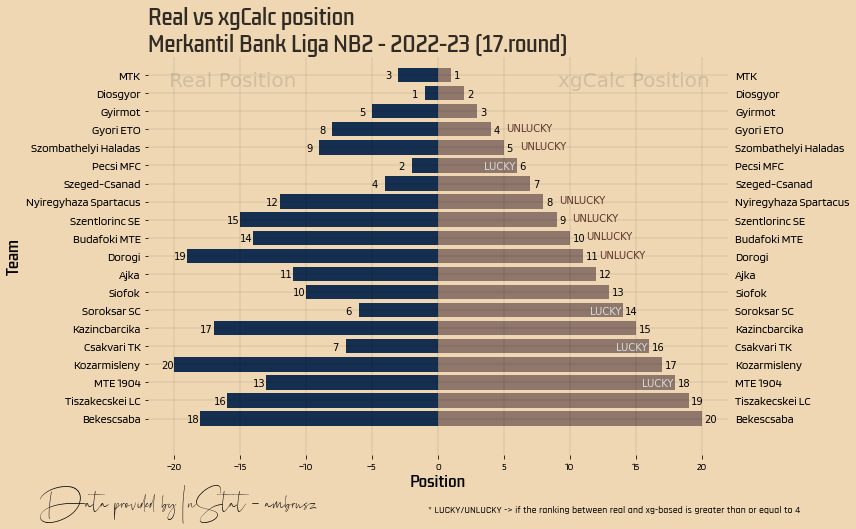

In [24]:
plot_xTab(d17)